In [2]:
import sys
print(sys.version)

import os
print(os.getcwd())

3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)]
C:\Users\abuchake\Downloads


In [3]:
import pandas as pd
import time
print("pandas imported as pd")
import numpy as np
print("numpy imported as np")
import matplotlib
import matplotlib.pyplot as mp
print("matplotlib imported")
time.ctime()

pandas imported as pd
numpy imported as np
matplotlib imported


'Sat Dec  9 19:00:15 2023'

In [4]:
# Reading the .csv file.
dmart_grocery=pd.read_csv('C:/Users/abuchake/dmart_grocery.csv')

#info command dispalys the basic information about the dataset. 
dmart_grocery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Grocery_Name    934 non-null    object
 1   MRP_Price       934 non-null    int64 
 2   Discount_Price  934 non-null    int64 
 3   Quantity        934 non-null    object
 4   brand_name      934 non-null    object
 5   price_per_unit  934 non-null    object
dtypes: int64(2), object(4)
memory usage: 43.9+ KB


In [5]:
print("dmart_grocery_columns:",dmart_grocery.columns)
print('Total columns in Dataset:',len(dmart_grocery.columns))
print('Shape of current dataset:',dmart_grocery.shape)

dmart_grocery_columns: Index(['Grocery_Name', 'MRP_Price', 'Discount_Price', 'Quantity', 'brand_name',
       'price_per_unit'],
      dtype='object')
Total columns in Dataset: 6
Shape of current dataset: (934, 6)


In [6]:
print("Top 5 recs:")
print(dmart_grocery.head(5))
print("Last 5 recs:")
dmart_grocery.tail(5)

Top 5 recs:
                            Grocery_Name  MRP_Price  Discount_Price Quantity  \
0       Premia Badam (Almonds) : 500 gms        524             393   500 gm   
1  ProV Select California Almonds : 1 kg       1349             599     1 kg   
2                    Chana Dal : 500 gms         74              53   500 gm   
3               Premia Chana Dal : 1 Kgs        133             104     1 kg   
4       Nutraj California Almonds : 1 kg       1149             739     1 kg   

  brand_name price_per_unit  
0     Premia         ₹ 0.79  
1       ProV       ₹ 599.00  
2      Chana         ₹ 0.11  
3     Premia         ₹ 0.11  
4     Nutraj       ₹ 739.00  
Last 5 recs:


,Grocery_Name,MRP_Price,Discount_Price,Quantity,brand_name,price_per_unit
929,Premia Rice Atta : 1 Kg,64,52,1 kg,Premia,₹ 0.13
930,Premia Sabudana Small : 500 gms,58,46,500 gm,Premia,₹ 0.09
931,Idli Rava : 500 gms,35,24,500 gm,Idli,₹ 0.05
932,Premia Jawari Atta : 500 gms,55,40,500 gm,Premia,₹ 0.05
933,Swaad Refined Sunflower Oil : 1 Litre,150,101,1 L,Swaad,₹ 101.00


In [7]:
dmart_grocery.describe(include='all')

,Grocery_Name,MRP_Price,Discount_Price,Quantity,brand_name,price_per_unit
count,934,934.000000,934.000000,934,934,934
unique,780,NaN,NaN,47,187,337
top,Premia Badam (Almonds) : 500 gms,NaN,NaN,500 gm,Premia,₹ 0.11
freq,2,NaN,NaN,257,238,22
mean,NaN,295.131692,216.216274,NaN,NaN,NaN
std,NaN,491.965885,369.896979,NaN,NaN,NaN
min,NaN,10.000000,8.000000,NaN,NaN,NaN
25%,NaN,78.000000,57.000000,NaN,NaN,NaN
50%,NaN,140.000000,100.000000,NaN,NaN,NaN
75%,NaN,299.000000,208.000000,NaN,NaN,NaN


In [8]:
# By checking the price_per_unit we get to know that it has rupees sign init.We would have to replace it and convert it to float
print('price_per_unit_before:',dmart_grocery.price_per_unit)
dmart_grocery['price_per_unit'] = dmart_grocery['price_per_unit'].str.replace('₹', '')
dmart_grocery['price_per_unit'] = dmart_grocery.price_per_unit.astype(float)
dmart_grocery.price_per_unit

price_per_unit_before: 0        ₹ 0.79
1      ₹ 599.00
2        ₹ 0.11
3        ₹ 0.11
4      ₹ 739.00
         ...   
929      ₹ 0.13
930      ₹ 0.09
931      ₹ 0.05
932      ₹ 0.05
933    ₹ 101.00
Name: price_per_unit, Length: 934, dtype: object


0        0.79
1      599.00
2        0.11
3        0.11
4      739.00
        ...  
929      0.13
930      0.09
931      0.05
932      0.05
933    101.00
Name: price_per_unit, Length: 934, dtype: float64

,MRP_Price,Discount_Price,price_per_unit
MRP_Price,1.000000,0.981773,0.585635
Discount_Price,0.981773,1.000000,0.566314
price_per_unit,0.585635,0.566314,1.000000


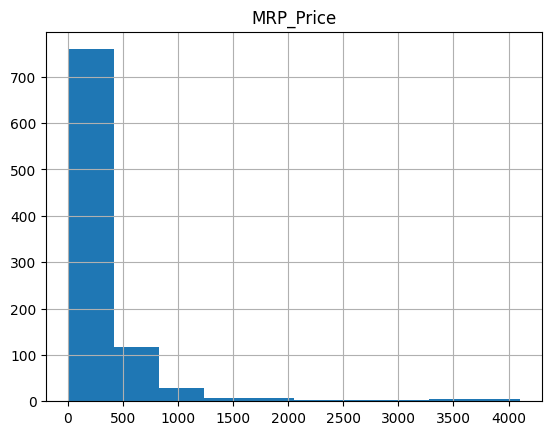

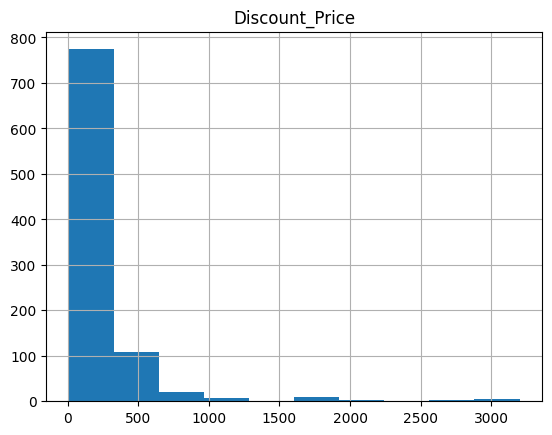

In [70]:
#Need to convert MRP_Price and Discount_Price in float
dmart_grocery['MRP_Price'] = dmart_grocery.MRP_Price.astype(float)
dmart_grocery['Discount_Price'] = dmart_grocery.Discount_Price.astype(float)
dmart_grocery.hist('MRP_Price')
dmart_grocery.hist('Discount_Price')
corr = dmart_grocery.corr(numeric_only = True)
corr

In [9]:
import seaborn as sb 
dataplot = sb.heatmap(corr, cmap="YlGnBu", annot=True) 
  
# displaying heatmap 
mp.show()

NameError: name 'corr' is not defined

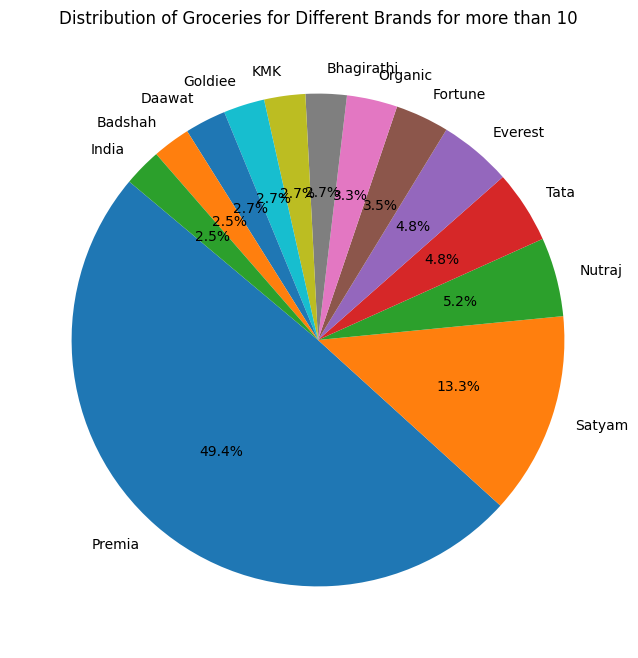

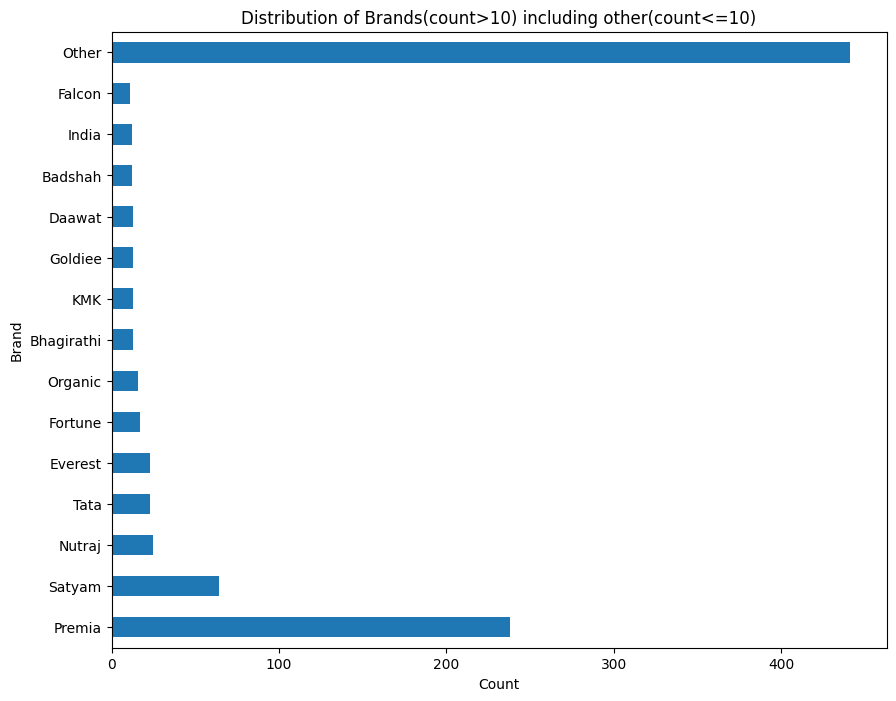

In [10]:
brand_counts = dmart_grocery["brand_name"].value_counts()
brand_count_morethan10 = brand_counts[brand_counts > 11]

brand_counts['Other'] = brand_counts[brand_counts <= 10].sum()

brand_count_morethan5 = brand_counts[brand_counts > 10]

# Plotting the pie chart
mp.figure(figsize=(10, 8))
mp.pie(brand_count_morethan10, labels=brand_count_morethan10.index, autopct='%1.1f%%', startangle=140)
mp.title('Distribution of Groceries for Different Brands for more than 10')
mp.show()

mp.figure(figsize=(10, 8))
brand_count_morethan5.plot(kind='barh')
mp.title('Distribution of Brands(count>10) including other(count<=10)')
mp.xlabel('Count')
mp.ylabel('Brand')
mp.show()

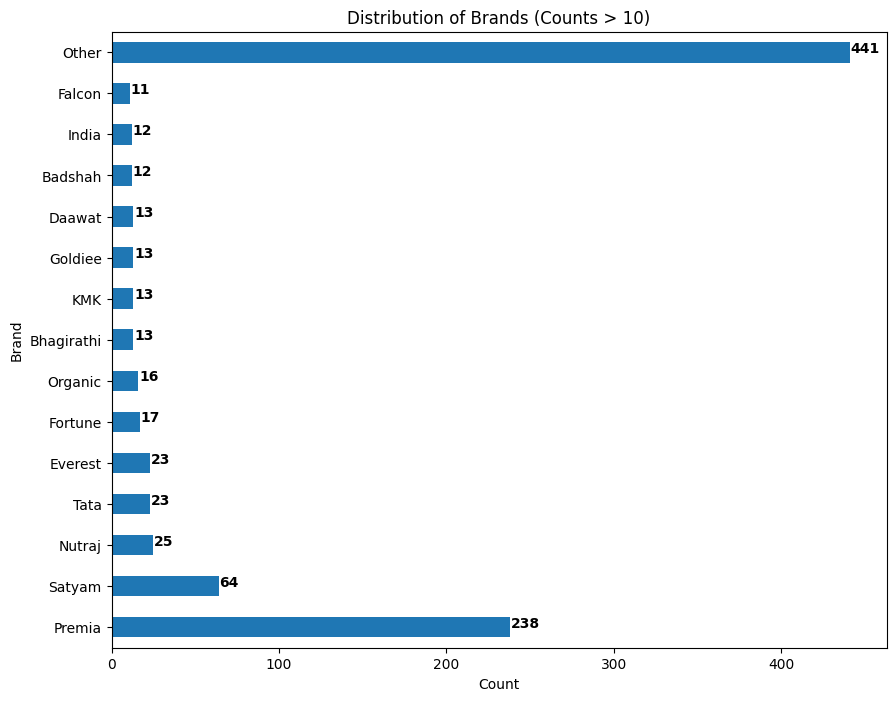

In [11]:
# This is to add count infront of bars to give actual counts for each Brancd in dataset. Others bar has Brands which has count less than 10
mp.figure(figsize=(10, 8))
ax = brand_count_morethan5.plot(kind='barh')

# Add count values on top of each bar
for i, v in enumerate(brand_count_morethan5):
    ax.text(v + 0.5, i, str(v), color='black', fontweight='bold')

mp.title('Distribution of Brands (Counts > 10)')
mp.xlabel('Count')
mp.ylabel('Brand')
mp.show()

In [12]:
Diff = dmart_grocery.MRP_Price - dmart_grocery.Discount_Price
Diff_per = ((Diff/dmart_grocery.MRP_Price)*100)
print("MRP:",dmart_grocery.MRP_Price,"Dis_price:",dmart_grocery.Discount_Price,"Diff:",Diff,"perc dis:",Diff_per)

MRP: 0       524
1      1349
2        74
3       133
4      1149
       ... 
929      64
930      58
931      35
932      55
933     150
Name: MRP_Price, Length: 934, dtype: int64 Dis_price: 0      393
1      599
2       53
3      104
4      739
      ... 
929     52
930     46
931     24
932     40
933    101
Name: Discount_Price, Length: 934, dtype: int64 Diff: 0      131
1      750
2       21
3       29
4      410
      ... 
929     12
930     12
931     11
932     15
933     49
Length: 934, dtype: int64 perc dis: 0      25.000000
1      55.596738
2      28.378378
3      21.804511
4      35.683203
         ...    
929    18.750000
930    20.689655
931    31.428571
932    27.272727
933    32.666667
Length: 934, dtype: float64


In [14]:
dmart_grocery["Total Disc"] = Diff
dmart_grocery["Percetage Disc"] = Diff_per

In [16]:
dmart_grocery

,Grocery_Name,MRP_Price,Discount_Price,Quantity,brand_name,price_per_unit,Total Disc,Percetage Disc
0,Premia Badam (Almonds) : 500 gms,524,393,500 gm,Premia,0.79,131,25.000000
1,ProV Select California Almonds : 1 kg,1349,599,1 kg,ProV,599.00,750,55.596738
2,Chana Dal : 500 gms,74,53,500 gm,Chana,0.11,21,28.378378
3,Premia Chana Dal : 1 Kgs,133,104,1 kg,Premia,0.11,29,21.804511
4,Nutraj California Almonds : 1 kg,1149,739,1 kg,Nutraj,739.00,410,35.683203
...,...,...,...,...,...,...,...,...
929,Premia Rice Atta : 1 Kg,64,52,1 kg,Premia,0.13,12,18.750000
930,Premia Sabudana Small : 500 gms,58,46,500 gm,Premia,0.09,12,20.689655
931,Idli Rava : 500 gms,35,24,500 gm,Idli,0.05,11,31.428571
932,Premia Jawari Atta : 500 gms,55,40,500 gm,Premia,0.05,15,27.272727


In [17]:
dmart_grocery['Percetage Disc'] = dmart_grocery['Percetage Disc'].round(2)

In [18]:
dmart_grocery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Grocery_Name    934 non-null    object 
 1   MRP_Price       934 non-null    int64  
 2   Discount_Price  934 non-null    int64  
 3   Quantity        934 non-null    object 
 4   brand_name      934 non-null    object 
 5   price_per_unit  934 non-null    float64
 6   Total Disc      934 non-null    int64  
 7   Percetage Disc  934 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 58.5+ KB


In [19]:
dmart_grocery.to_csv('dmart_grocery_clean.csv',index=False)